In [2]:
#I used the official userguides of mlxtend for apriori and association_rules for this project.

In [3]:
import sys
!{sys.executable} -m pip install apyori
!{sys.executable} -m pip install mlxtend

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [5]:
marketData = pd.read_csv(r"C:\Users\nefle\mbo.csv", header=None)
marketData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
itemsets = []
for i in range(0, 7501):
    itemsets.append([str(marketData.values[i,j]) for j in range(0, 20)])
for i,j in enumerate(itemsets):
    while 'nan' in itemsets[i]: itemsets[i].remove('nan')
#data are now in the form of a list of lists eg. list of itemsets
itemsets[1:10]

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries']]

In [15]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [16]:
te = TransactionEncoder()
te_ary = te.fit(itemsets).transform(itemsets)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
#generating frequent itemsets
from mlxtend.frequent_patterns import apriori

frequent_itemsets0 = apriori(df, min_support=0.02, use_colnames = True)
frequent_itemsets0

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(mineral water, whole wheat rice)"
99,0.022930,"(olive oil, spaghetti)"
100,0.025197,"(pancakes, spaghetti)"
101,0.021197,"(spaghetti, shrimp)"


In [18]:
#generating rules
from mlxtend.frequent_patterns import association_rules

rules0 = association_rules(frequent_itemsets0, metric="confidence", min_threshold=0.15)
rules0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
2,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,0.007096,1.108844
3,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
4,(burgers),(spaghetti),0.087188,0.174110,0.021464,0.246177,1.413918,0.006283,1.095602
...,...,...,...,...,...,...,...,...,...
66,(whole wheat rice),(mineral water),0.058526,0.238368,0.020131,0.343964,1.442993,0.006180,1.160960
67,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048
68,(pancakes),(spaghetti),0.095054,0.174110,0.025197,0.265077,1.522468,0.008647,1.123778
69,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,0.008756,1.174209


In [19]:
#gathering data for minsup vs. frequent datasets: i'll change minsup each time and gather the number of frequent datasets
#by getting the size of the dataframe

#1st data point
frequent_itemsets1 = apriori(df, min_support=0.01, use_colnames = True)
frequent_itemsets1.shape[0]

257

In [20]:
#2nd data point
frequent_itemsets2 = apriori(df, min_support=0.05, use_colnames = True)
frequent_itemsets2.shape[0]

28

In [21]:
#3rd data point
frequent_itemsets3 = apriori(df, min_support=0.1, use_colnames = True)
frequent_itemsets3.shape[0]

7

In [22]:
#4th data point
frequent_itemsets4 = apriori(df, min_support=0.15, use_colnames = True)
frequent_itemsets4.shape[0]

5

In [23]:
#5th data point
frequent_itemsets5 = apriori(df, min_support=0.2, use_colnames = True)
frequent_itemsets5.shape[0]

1

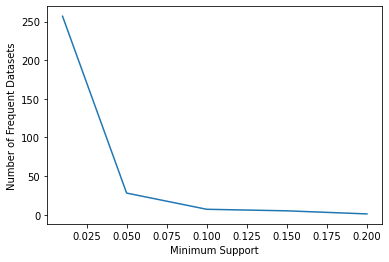

In [24]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.array([0.01, 0.05, 0.1, 0.15, 0.2])
y1 = np.array([257, 28, 7, 5, 1])
plt.plot(x1, y1)
plt.xlabel("Minimum Support")
plt.ylabel("Number of Frequent Datasets")
plt.show()

In [25]:
#gathering data for confidence vs. number of association rules: i'll change confidence each time and gather the number
#of frequent datasets by getting the size of the dataframe. I'm keeping the same chosen frequent itemset for each 
#calculation.

#1st data point
rules1 = association_rules(frequent_itemsets0, metric="confidence", min_threshold=0.05)
rules1.shape[0]

100

In [26]:
#2nd data point
rules2 = association_rules(frequent_itemsets0, metric="confidence", min_threshold=0.10)
rules2.shape[0]

94

In [27]:
#3rd data point
rules3 = association_rules(frequent_itemsets0, metric="confidence", min_threshold=0.20)
rules3.shape[0]

55

In [28]:
#4th data point
rules4 = association_rules(frequent_itemsets0, metric="confidence", min_threshold=0.30)
rules4.shape[0]

20

In [29]:
#5th data point
rules5 = association_rules(frequent_itemsets0, metric="confidence", min_threshold=0.40)
rules5.shape[0]

3

In [30]:
#6th data point
rules5 = association_rules(frequent_itemsets0, metric="confidence", min_threshold=0.50)
rules5.shape[0]

0

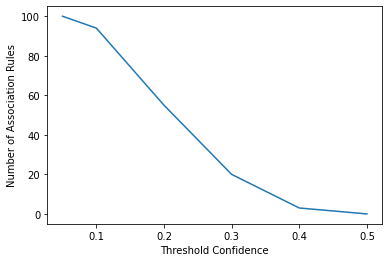

In [50]:
import matplotlib.pyplot as plt
import numpy as np
x2 = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5])
y2 = np.array([100, 94, 55, 20, 3, 0])
plt.plot(x2, y2)
plt.xlabel("Threshold Confidence")
plt.ylabel("Number of Association Rules")
plt.show()